<h1 style="text-align: center;">TEXT DATA ANALAYSIS</h1>


In [7]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
comments = pd.read_csv("UScomments.csv",on_bad_lines='skip')

In [9]:
comments

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [10]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


# Exploratory Data Analysis

In [11]:
# Check for missing values
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [12]:
# Drop rows that has missing values 
comments.dropna(inplace=True)

In [13]:
comments.shape

(691374, 4)

In [14]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# Perform Sentiment Analysis

In [15]:
# Perform sentiment analysis using textblob which is a NLP library built on top of NLTK.
!pip install textblob

In [16]:
from textblob import TextBlob

In [17]:
comments.head(10)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [18]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [19]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [20]:
comments['polarity'] = polarity

In [21]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


# Wordcloud Analysis
It is a graphical representation of text data or a text frequency so that you are able to understand which are my most important words or which are my most important keywords. 

In [22]:
!pip install wordcloud

In [23]:
from wordcloud import WordCloud, STOPWORDS

In [24]:
# Lets perform EDA for the highly Positve sentences ie Polarity value will be 1 
filter_comments_positive = comments[comments["polarity"] == 1]

In [25]:
filter_comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [26]:
filter_comments_negative = comments[comments["polarity"] == -1]
filter_comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [39]:
total_comments_positive = ' '.join(filter_comments_positive['comment_text'])

In [47]:
wordcloud_positive = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

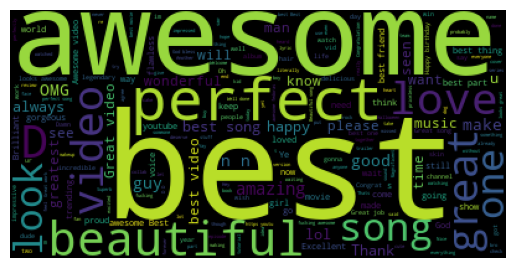

In [65]:
plt.imshow(wordcloud_positive)
plt.axis('off')

Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc.

In [59]:
total_comments_negative = ' '.join(filter_comments_negative['comment_text'])

In [60]:
wordcloud_negative = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

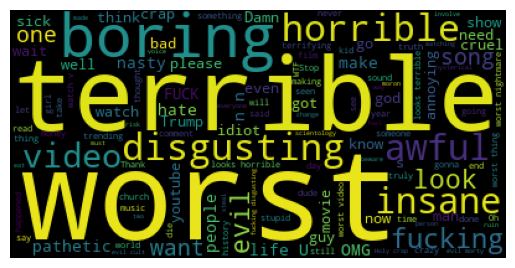

In [64]:
plt.imshow(wordcloud_negative)
plt.axis('off')

Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc.

# Emoji's Analysis

In [66]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 1.7 MB/s eta 0:00:0000:0100:01


In [67]:
import emoji

In [70]:
comments['comment_text'].head()

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

In [72]:
text = 'trending 😉'

In [75]:
[char for char in text if char in emoji.EMOJI_DATA]

['😉']

In [77]:
emoji_list = []

for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [78]:
emoji_list

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻',
 '❤',
 '😂',
 '❤',
 '💎',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😂',
 '😂',
 '😂',
 '😂',
 '😭',
 '😒',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '😊',
 '❤',
 '👈',
 '😂',
 '😂',
 '👌',
 '👌',
 '🤔',
 '👈',
 '😂',
 '😂',
 '😁',
 '💔',
 '😂',
 '👎',
 '👎',
 '👎',
 '👎',
 '👎',
 '🍎',
 '😤',
 '😂',
 '😂',
 '😂',
 '😂',
 '👈',
 '😭',
 '😭',
 '😭',
 '😢',
 '😢',
 '😢',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '💋',
 '💋',
 '👫',
 '💘',
 '😻',
 '💋',
 '💋',
 '💖',
 '💖',
 '💖',
 '💖'

In [80]:
from collections import Counter

In [86]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [94]:
top_10_emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [95]:
top_10_emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [96]:
top_10_emojis_freq = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [97]:
top_10_emojis_freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [99]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [102]:
trace = go.Bar(x= top_10_emojis,y=top_10_emojis_freq)

In [104]:
iplot([trace])

Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding.

# Collect Entire data of Youtube

In [105]:
import os

In [111]:
files = os.listdir(r'additional_data')
files

['JPvideos.csv',
 'MXvideos.csv',
 'USvideos.csv',
 'CAvideos.csv',
 'FRvideos.csv',
 'RUvideos.csv',
 'KRvideos.csv',
 'RU_category_id.json',
 'KR_category_id.json',
 'MX_category_id.json',
 'DEvideos.csv',
 'INvideos.csv',
 'FR_category_id.json',
 'IN_category_id.json',
 'CA_category_id.json',
 'GB_category_id.json',
 'GBvideos.csv',
 'JP_category_id.json',
 'US_category_id.json',
 'DE_category_id.json']

In [114]:
files_csv = [file for file in files if '.csv' in file]
files_csv

['JPvideos.csv',
 'MXvideos.csv',
 'USvideos.csv',
 'CAvideos.csv',
 'FRvideos.csv',
 'RUvideos.csv',
 'KRvideos.csv',
 'DEvideos.csv',
 'INvideos.csv',
 'GBvideos.csv']

In [ ]:
full_df = pd.DataFrame()
path = 'additional_data'

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1')
    full_df = pd.concat([current_df,full_df],ignore_index=True)

In [117]:
full_df.shape

(375942, 16)

In [118]:
full_df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,âº HOW MY RELATIONSHIP STARTED!\nâº PB Merch...
6,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
7,-N5eucPMTTc,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...
8,LMCuKltaY3M,17.14.11,Elbow - Golden Slumbers (John Lewis Advert 2017),ElbowVEVO,10,2017-11-10T08:00:01.000Z,"Elbow|""Golden""|""Slumbers""|""Polydor""|""Alternative""",154494,2163,147,211,https://i.ytimg.com/vi/LMCuKltaY3M/default.jpg,False,False,False,"âGolden Slumbersâ, originally by The Beatl..."
9,9t9u_yPEidY,17.14.11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",JenniferLopezVEVO,10,2017-11-10T15:00:00.000Z,"Jennifer Lopez ft. Wisin|""Jennifer Lopez ft. W...",9548677,190084,15015,11473,https://i.ytimg.com/vi/9t9u_yPEidY/default.jpg,False,False,False,"Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O..."


In [121]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [122]:
full_df.drop_duplicates(inplace=True)

In [123]:
full_df.shape

(339525, 16)

# Which Category has maximum likes?

In [128]:
json_df = pd.read_json(r'additional_data/US_category_id.json')

In [129]:
json_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [130]:
json_df['items']

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [131]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [145]:
category_dict = {}

for item in json_df['items'].values:
    category_dict[int(item['id'])] = item['snippet']['title']

In [146]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [149]:
full_df['category_name'] = full_df['category_id'].map(category_dict)

In [150]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics


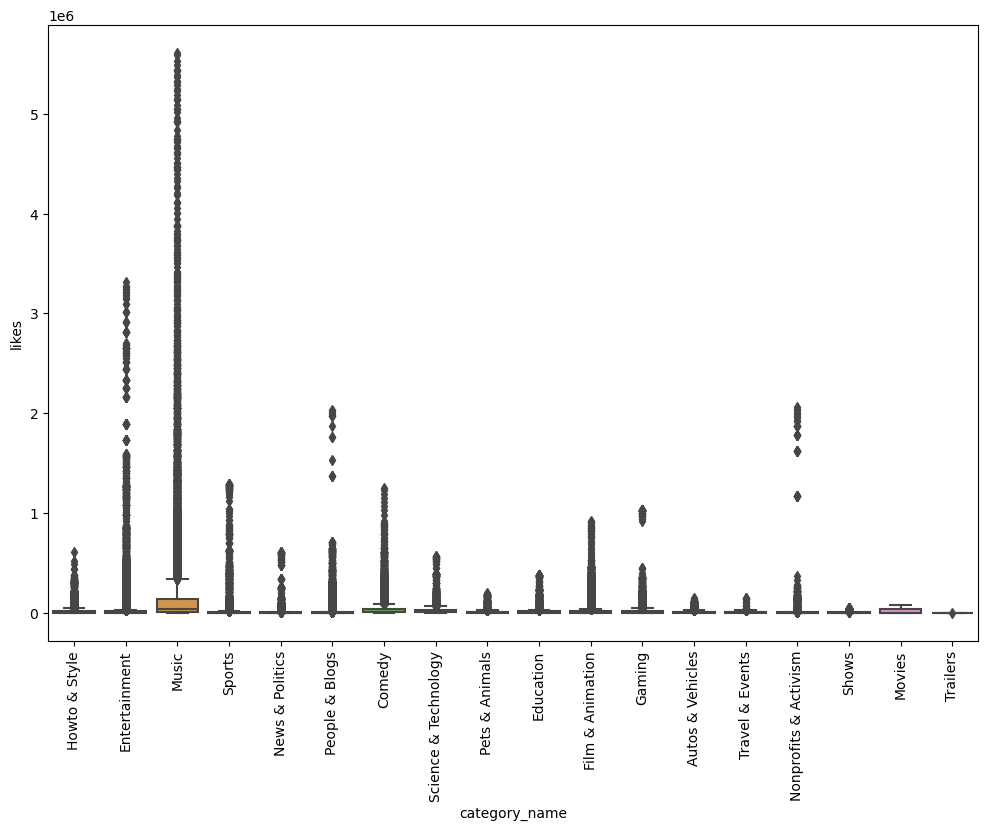

In [164]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

# Find out whether audience is engaged or not.

In [162]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

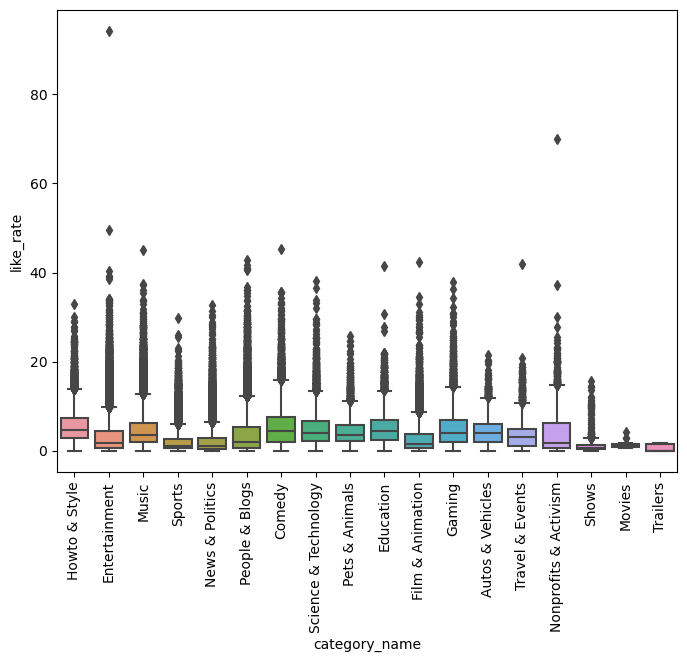

In [168]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

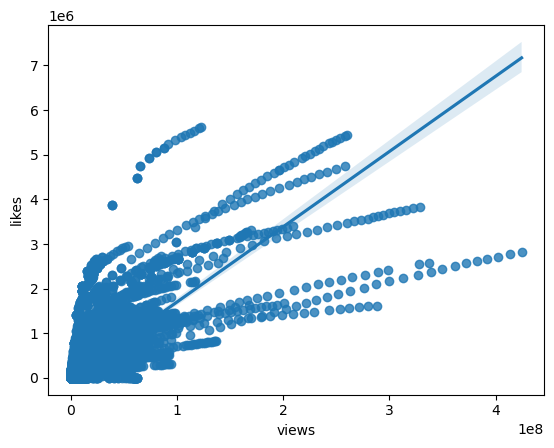

In [170]:
# Relation between Views and Likes
sns.regplot(x='views',y='likes',data=full_df)
plt.show()

In [171]:
full_df[['likes','dislikes','views']].corr()

,likes,dislikes,views
likes,1.000000,0.451809,0.779531
dislikes,0.451809,1.000000,0.405428
views,0.779531,0.405428,1.000000


<Axes: >

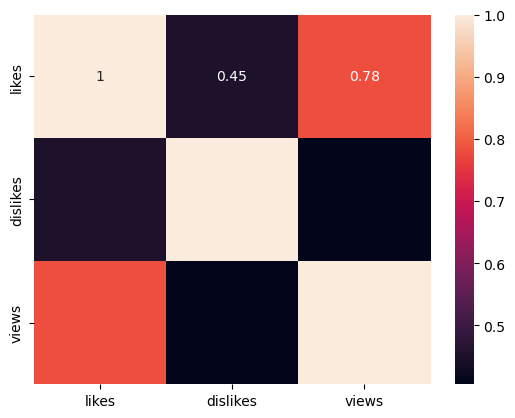

In [174]:
sns.heatmap(full_df[['likes','dislikes','views']].corr(),annot=True)

# Which channel have the largest number of trending videos.

In [179]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [182]:
cdf = cdf.rename(columns={0:'total_views'})

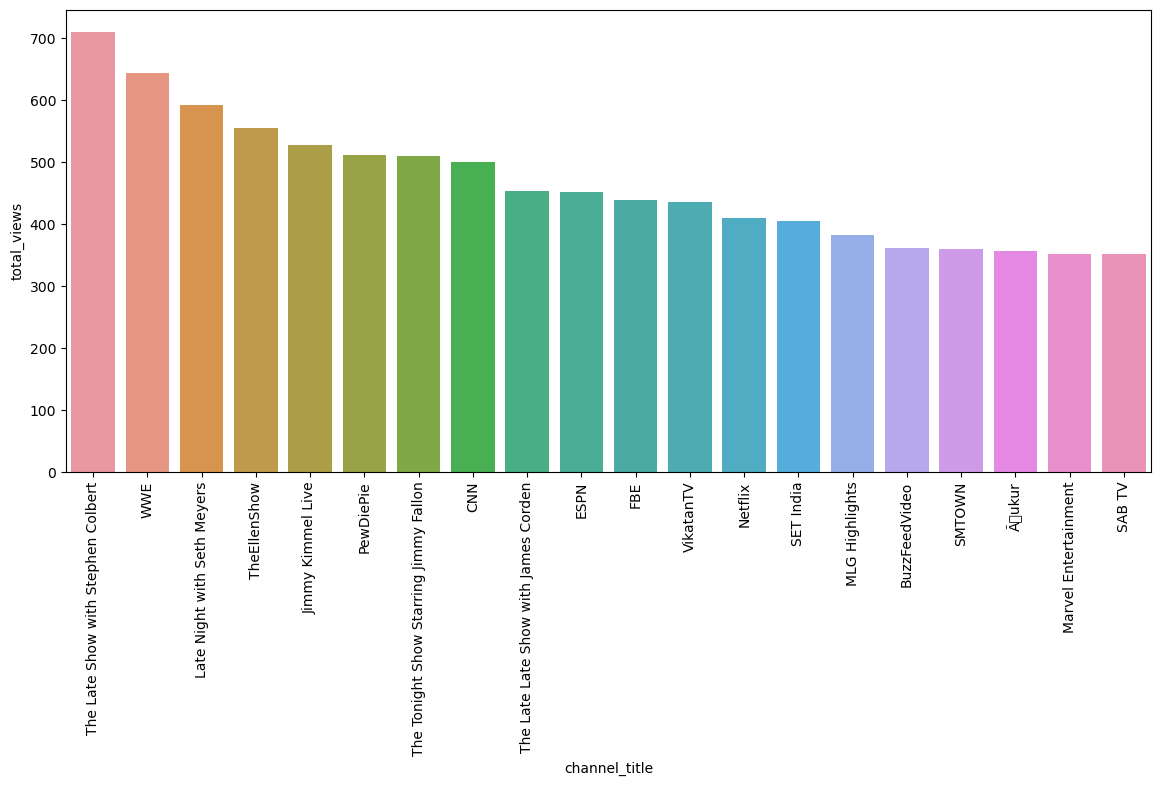

In [196]:
plt.figure(figsize=(14,6))
sns.barplot(x='channel_title',y='total_views',data=cdf[0:20])
plt.xticks(rotation='vertical')
plt.show()  


# Does punctuations in title and tags have any relation with views, likes, dislikes comments? 

In [199]:
import string

In [200]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [203]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])


In [204]:
full_df['count_punc'] = full_df['title'].apply(punc_count)

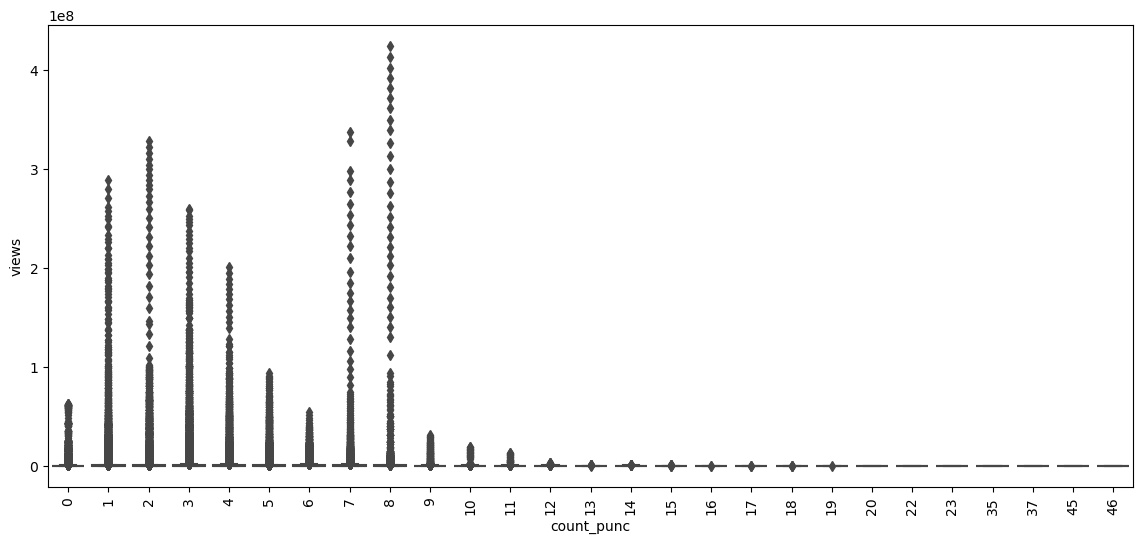

In [207]:
plt.figure(figsize=(14,6))
sns.boxplot(x='count_punc',y='views',data=full_df)
plt.xticks(rotation='vertical')
plt.show()  

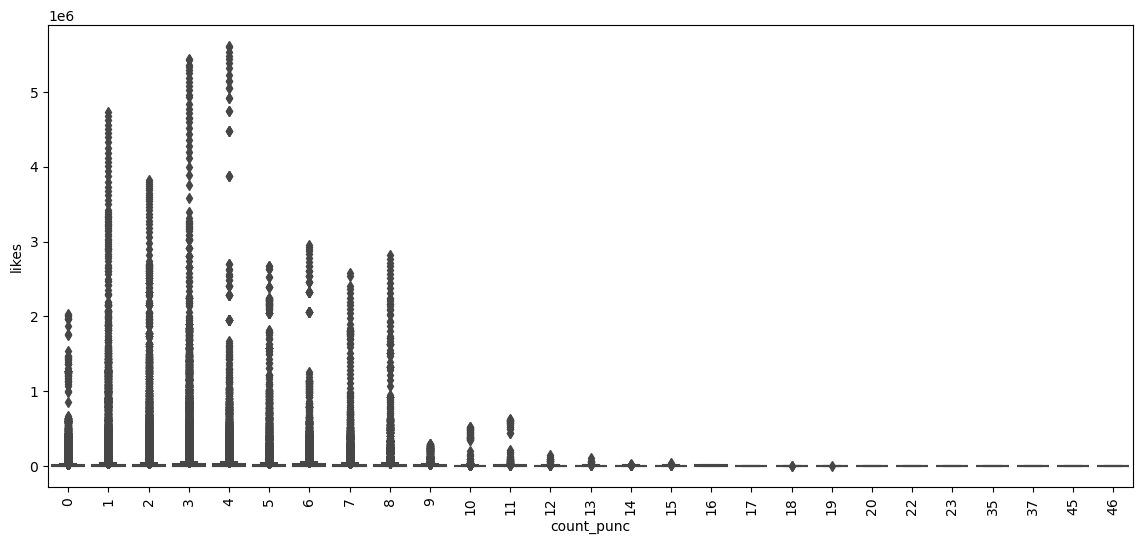

In [208]:
plt.figure(figsize=(14,6))
sns.boxplot(x='count_punc',y='likes',data=full_df)
plt.xticks(rotation='vertical')
plt.show()  